# Exploratory Data Analysis on Diabetes Dataset :

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 
  
import warnings 
warnings.filterwarnings('ignore')

### 1- Load and Explore Dataset :

The dataset consists of multiple medical predictor variables and one target variable (Outcome)

Data contains :

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: 1 if diabetes, 0 if no diabetes

In [2]:
data = pd.read_csv('diabetes.csv') 
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2- Data Preparation
This involves performing operations on the dataset to make it look more clean, removing outliers, etc.

- Dropping irrelevant rows and columns
- Renaming columns(if needed)
- Dropping Null values
- Identifying duplicated columns

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Let's replace 0 value with NaN value :

In [8]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN) 

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

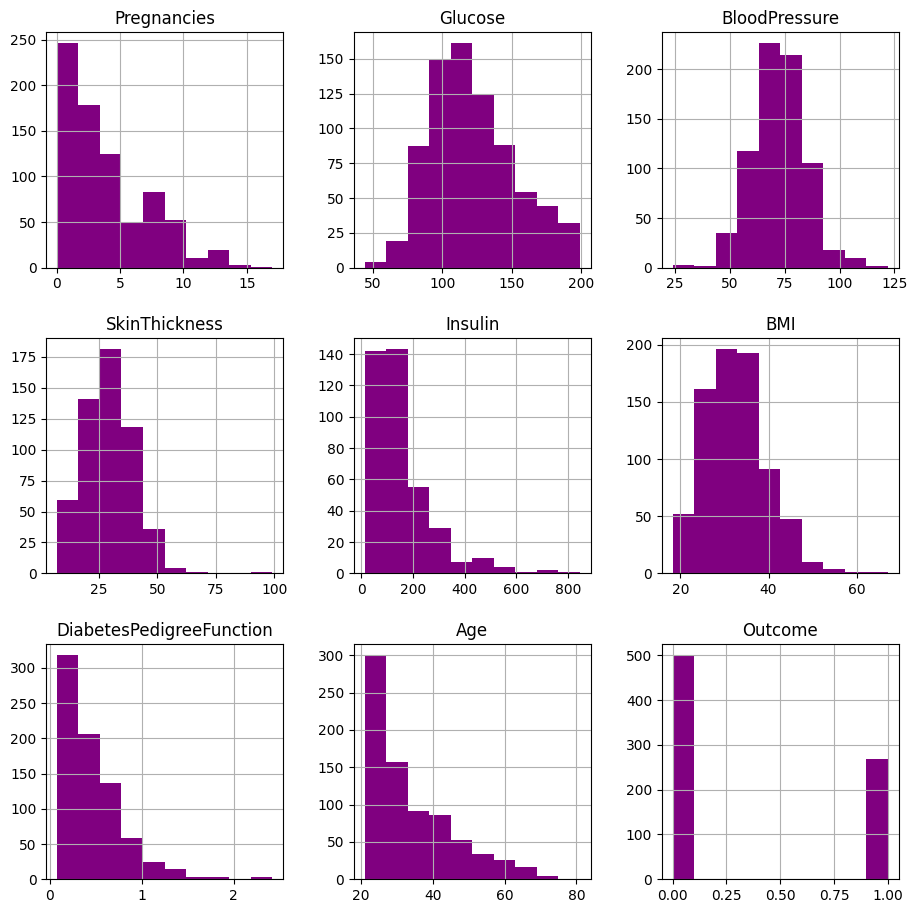

In [10]:
data.hist(figsize = (11,11), color="#800080")

replace nan values by mean value for each column :

In [11]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True) 
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True) 
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True) 
data['Insulin'].fillna(data['Insulin'].median(), inplace = True) 
data['BMI'].fillna(data['BMI'].median(), inplace = True) 
  
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3- Data Visualisation :

Bar Chart for Diabetes Result 

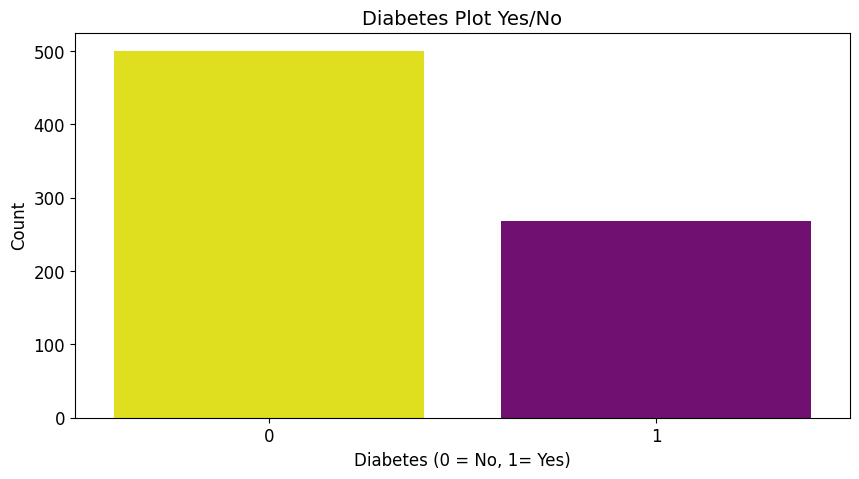

In [12]:
plt.figure(figsize=(10,5)) 
plt.title('Diabetes Plot Yes/No', fontsize=14) 
sns.countplot(x="Outcome", data=data, palette=('#FFFF00','#800080')) 
plt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12) 
plt.ylabel("Count", fontsize=12) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

BoxPlots to display the Distribution of features : 

Text(0.5, 1.0, 'Diabetes Outcome vs Age')

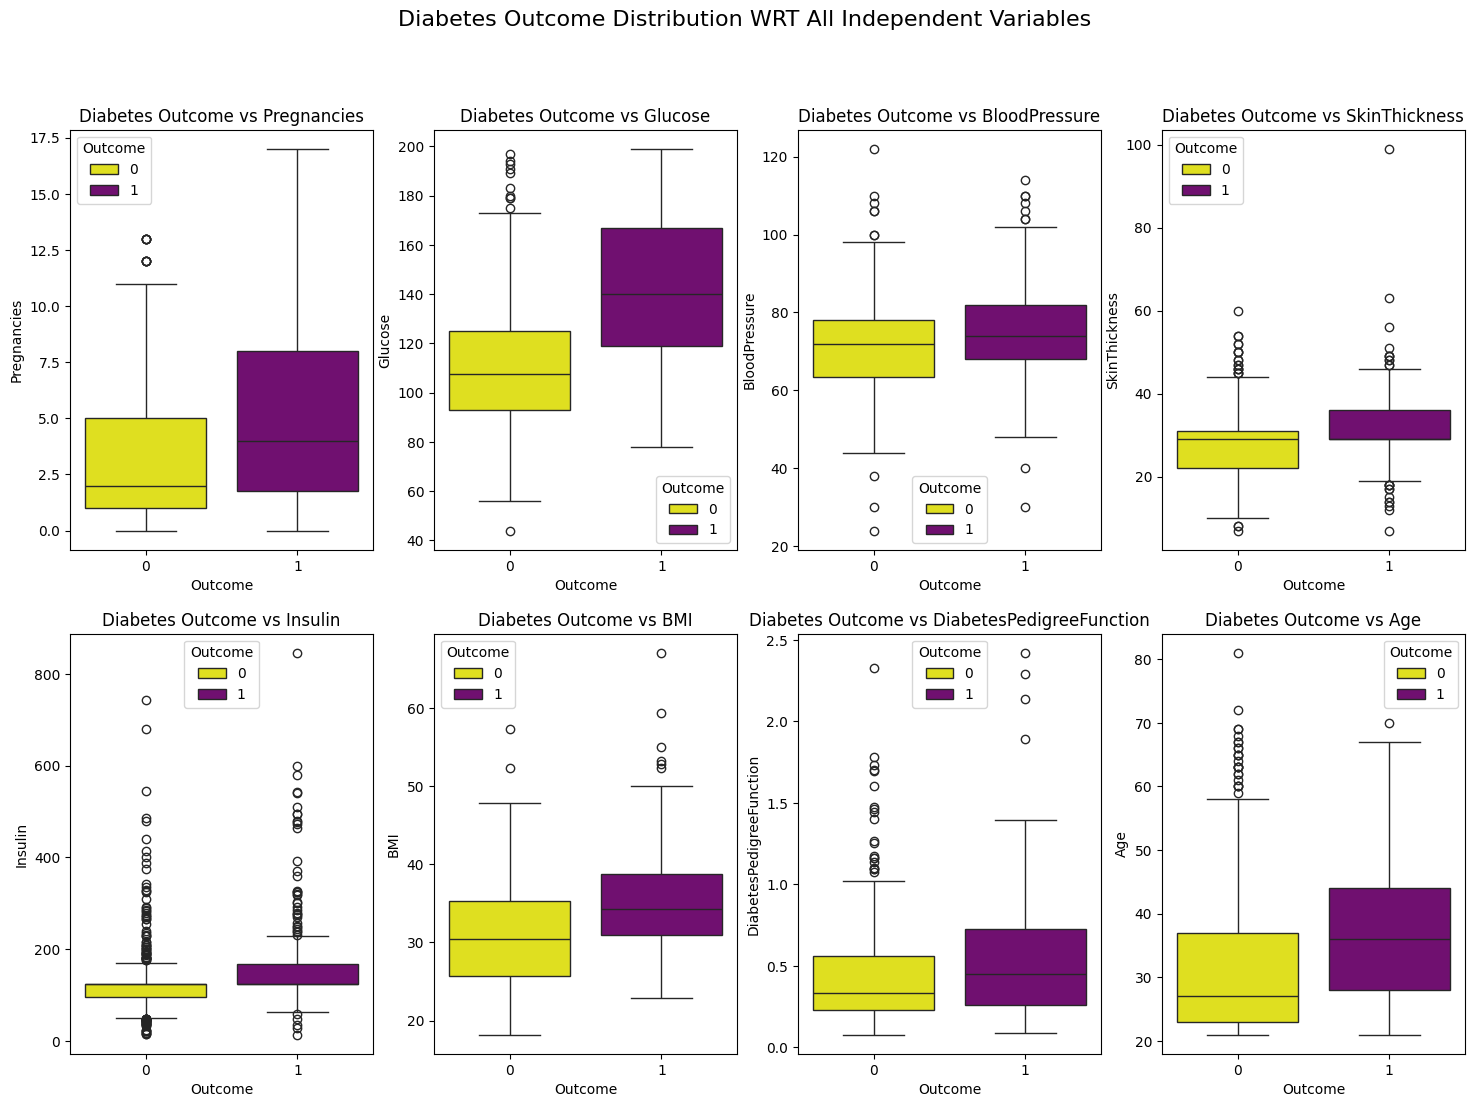

In [13]:

fig, axes = plt.subplots(2, 4, figsize=(18, 12)) 
fig.suptitle( 'Diabetes Outcome Distribution WRT All Independent Variables', fontsize=16) 
  
sns.boxplot(ax=axes[0, 0], x=data['Outcome'], y=data['Pregnancies'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[0, 0].set_title("Diabetes Outcome vs Pregnancies", fontsize=12) 
  
sns.boxplot(ax=axes[0, 1], x=data['Outcome'], y=data['Glucose'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[0, 1].set_title("Diabetes Outcome vs Glucose", fontsize=12) 
  
sns.boxplot(ax=axes[0, 2], x=data['Outcome'], y=data['BloodPressure'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[0, 2].set_title("Diabetes Outcome vs BloodPressure", fontsize=12) 
  
sns.boxplot(ax=axes[0, 3], x=data['Outcome'], y=data['SkinThickness'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[0, 3].set_title("Diabetes Outcome vs SkinThickness", fontsize=12) 
  
sns.boxplot(ax=axes[1, 0], x=data['Outcome'], y=data['Insulin'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[1, 0].set_title("Diabetes Outcome vs Insulin", fontsize=12) 
  
sns.boxplot(ax=axes[1, 1], x=data['Outcome'], y=data['BMI'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[1, 1].set_title("Diabetes Outcome vs BMI", fontsize=12) 
  
sns.boxplot(ax=axes[1, 2], x=data['Outcome'], y=data['DiabetesPedigreeFunction'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[1, 2].set_title("Diabetes Outcome vs DiabetesPedigreeFunction", fontsize=12) 
  
sns.boxplot(ax=axes[1, 3], x=data['Outcome'], y=data['Age'], hue=data['Outcome'], palette=('#FFFF00', '#800080')) 
axes[1, 3].set_title("Diabetes Outcome vs Age", fontsize=12) 

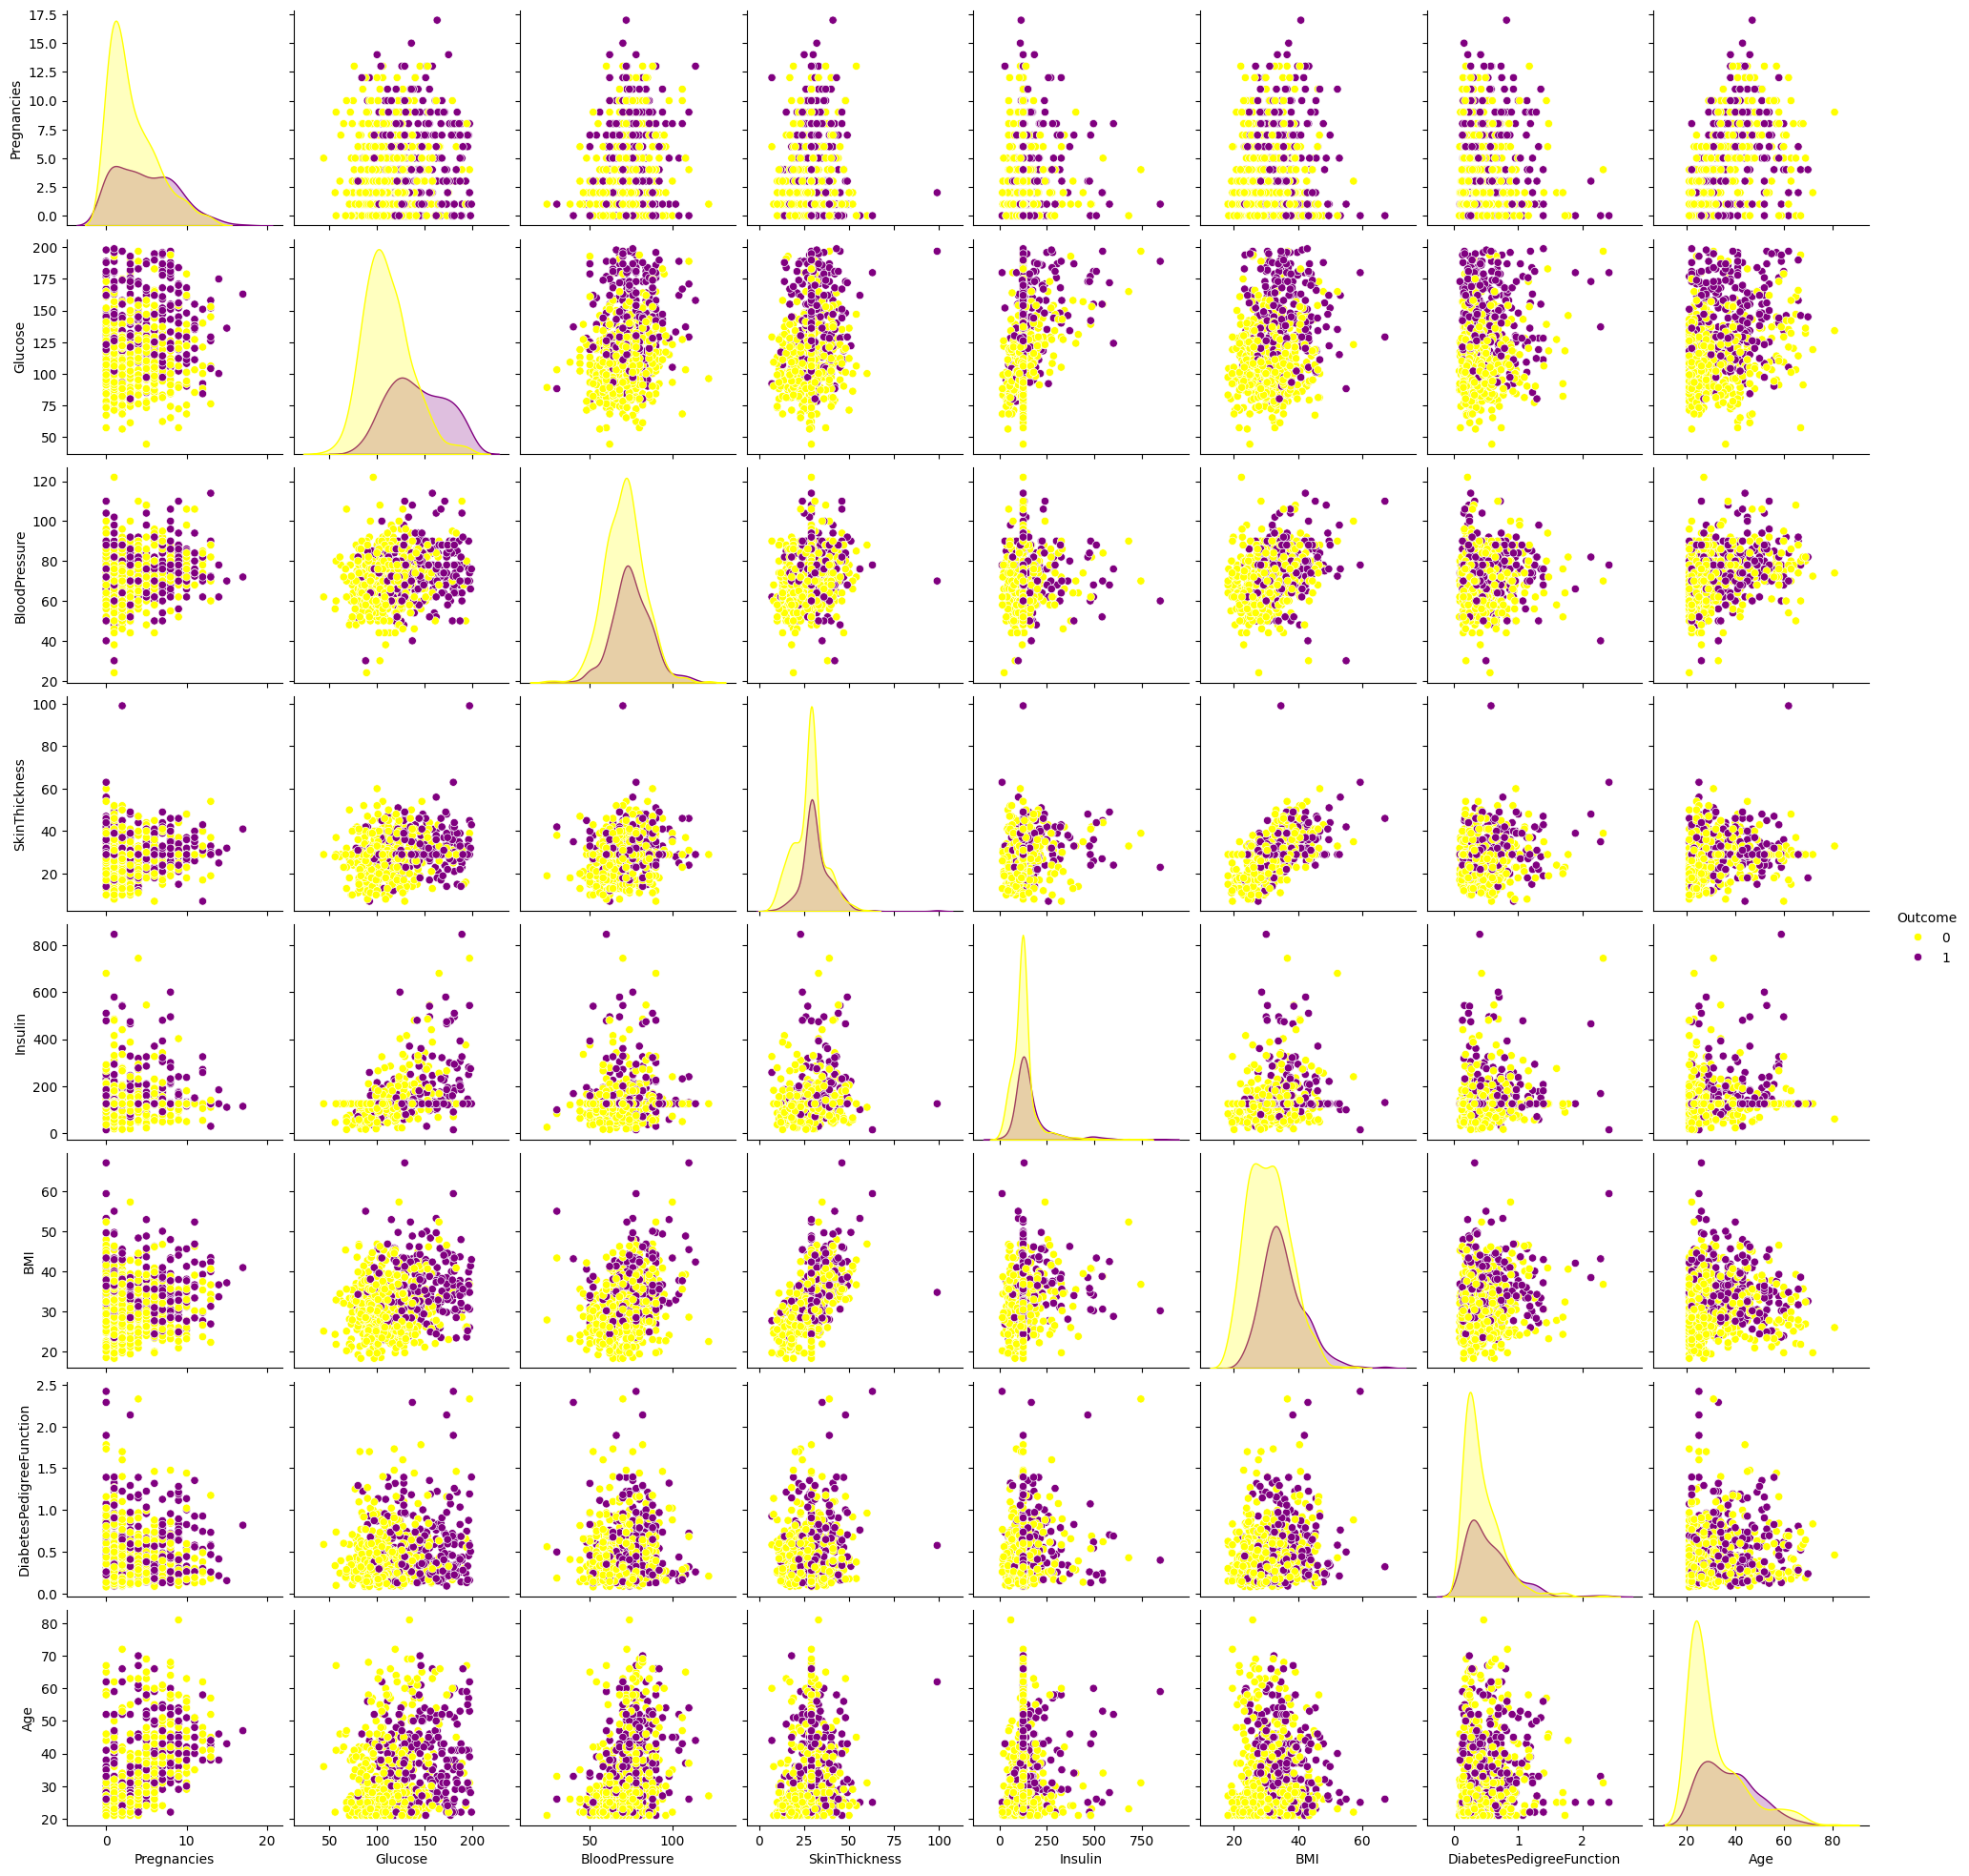

In [14]:
sns.pairplot(data, hue='Outcome', palette=('#FFFF00', '#800080')) 

Feature Correlation Matrix :

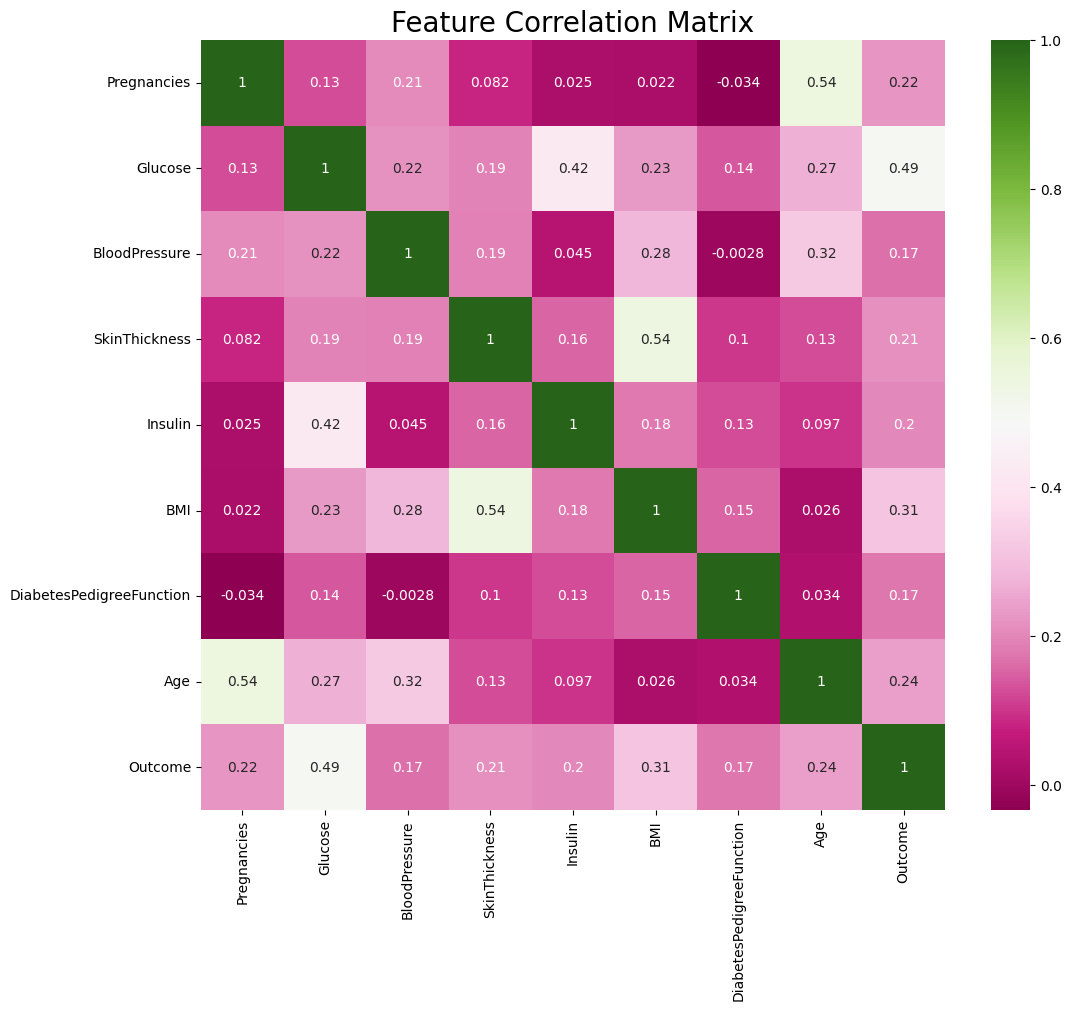

In [15]:
plt.figure(figsize=(12,10)) 
sns.heatmap(data.corr(), annot=True, cmap='PiYG') 
plt.title("Feature Correlation Matrix",fontsize=20) 
plt.show()

### Model Building/Training :

In [16]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
# separate features and target conlumns :
x = data.drop(['Outcome'],axis=1) 
y = data['Outcome']

In [18]:
# Standarize the data :
sc= StandardScaler() 
x_scaled= sc.fit_transform(x)

In [19]:
# split data for test set and train set :
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=0) 

In [20]:
x_train.shape, x_test.shape

((576, 8), (192, 8))

In [21]:
# Applying Logistic Regression
logreg = LogisticRegression() 
logreg.fit(x_train, y_train) 
y_pred = logreg.predict(x_test)

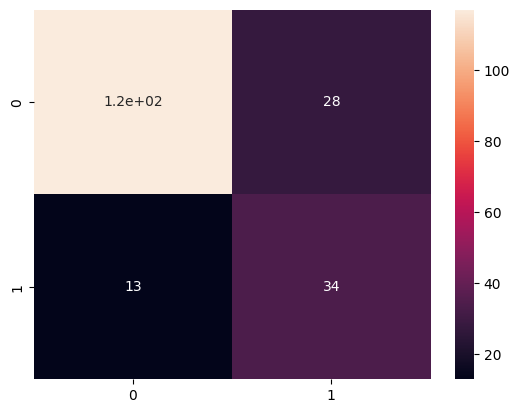

In [22]:
# evaluation of the model :
confmat = confusion_matrix(y_pred, y_test) 
sns.heatmap(confmat, annot=True)
plt.show()

In [23]:
accuracy_score(y_pred, y_test)

0.7864583333333334